In [1]:
# Libraries Used in the CA
from scipy.stats import binom, norm, poisson, t, ttest_ind
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Statisticics and Data Ananlysis 

## Q1 

### 1 

#### A

In [2]:
#Variables
connectors = 1000
sample = 55
defective = 150
#Probability of a single defective connector
p = defective / connectors
#(A) variable 2 deffective connectors
defective_a = 2

In [3]:
p

0.15

In [4]:
#Creating a binom dist with python library scipy.stats binom
binomial_distribution = binom(sample, p)

In [5]:
sample_range = range(0, sample + 1) #Plus 1 to include 55 in the range
prob_mass_values = binomial_distribution.pmf(sample_range) # Probability Mass to visualise the distribution

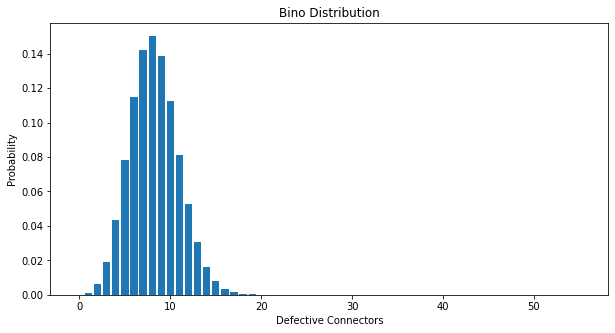

In [6]:
#Visualisation of the distribution
plt.figure(figsize=(10, 5))
plt.bar(sample_range, prob_mass_values) #possible defectives range, probability of them being defective
plt.title('Bino Distribution')
plt.xlabel('Defective Connectors')
plt.ylabel('Probability')
plt.show()

In [7]:
answer_1_a = binomial_distribution.cdf(defective_a) 

##### Answer 1 A 

In [8]:
answer_1_a

0.007473886818135139

#### B

##### Functions

In [9]:
def sigma_value(sample_size, p):
    return (sample_size * p * (1 - p)) ** 0.5

def z_value(observations, mean, stnd_dev):
    return (observations - mean) / stnd_dev

In [10]:
# Variables
mean = sample * p
sigma = sigma_value(sample, p)
z = z_value(defective_a, mean, sigma)

In [11]:
answer_1_b = z

##### Answer 1 B 

In [12]:
answer_1_b

-2.360171600154253

#### 2 

#### A 

In [13]:
#Variables
mean = .3
area = 100

# average particles across the entire area of the disc
mean_total = mean * area

particles_a = 12

In [14]:
# Probability Mass - the question is asking for the EXACT number of particles to be found (12)
p_12 = poisson.pmf(particles_a, mean_total)

##### Answer 2 A 

In [15]:
p_12

0.000103820624152057

#### B 

In [16]:
# Variables
particles_b = 40

In [17]:
# Cumulative Distrivution - the question is asking for atleast 40, we need to get everything under 40 first (non inclusive)
p_less_than_40 = poisson.cdf(particles_b - 1, mean_total)

# Deduct the percentage Under 40 from 1 to get the percentage OVER
p_40_or_more = 1 - p_less_than_40


##### Answer 2 B 

In [18]:
p_40_or_more

0.0462530376458421

### Q2 

#### A 

In [19]:
#Variables
mean = 82.5
stnd_dev = .1

# Standard deviation needs to be broken into two parts to get the lower side and the higher side
stnd_dev_split = stnd_dev / 2
lower_percent = stnd_dev_split
upper_percent = 1 - lower_percent

In [20]:
# the lower range of the 99 percentile
lower_range =  norm.ppf(lower_percent, mean, stnd_dev)
# the upper range of the 99 percentile
upper_range = norm.ppf(upper_percent, mean, stnd_dev)

In [21]:
upper_range

82.66448536269515

##### Answer 2 A 

In [22]:
f"The range is between lower {lower_range} and {upper_range}"

'The range is between lower 82.33551463730485 and 82.66448536269515'

#### B 

In [23]:
# Variables
temperatures = pd.Series([82.05, 82.15, 82.5, 82.65, 82.10, 82.25, 82.05, 81.95, 82.15, 82.00, 82.10, 81.90])
hypo_alpha = 0.05
null_hypo_mean = 82.5

In [24]:
# Amount of data points in our data set
observations = len(temperatures)

#Degrees of freedom are out observations less 1
degrees_of_freedom = observations -1

# Mean across our observations
mean = temperatures.mean()

# Standard Deviations with 1 Degree of Freedom
stnd_dev = temperatures.std(ddof=1)

#t table look up for 11 degrees of freedom with 0.05 significance (two tailed)
t_table_look_up = 2.201


In [25]:
#Function Formulas for T for our observasions in this data set
def get_t_value(mean, hypo_mean, stnd_dev, observations):
    return (mean - hypo_mean) / (stnd_dev / np.sqrt(observations))

# Margin of error formula
def get_margin_of_error(t_critical, stnd_dev, observations):
    return t_critical * (stnd_dev / np.sqrt(observations))

#Confidence Interval Formula
def get_confidence_interval(mean, margin_of_err):
    lower_range = mean - margin_of_err
    upper_range = mean + margin_of_err
    return lower_range, upper_range

def get_p_value(t_value, degrees_of_freedom):
    return t.sf(abs(t_value), degrees_of_freedom) * 2 

In [26]:
# Get T value for the observations in out data set
t_value = get_t_value(mean,null_hypo_mean, stnd_dev, observations)

# Margin of error
margin_of_error = get_margin_of_error(t_table_look_up, stnd_dev, observations)

#
lower_range, upper_range = get_confidence_interval(mean, margin_of_error)

p = get_p_value(t_value, degrees_of_freedom)

##### Answer 2 B

In [27]:
print(f"Confidence Interval lower: {lower_range}")
print(f"Confidence Interval Upper: {upper_range}")
print(f"t value: {t_value}")
print(f"p value: {p}")
print("P is significantly smaller so the hypothosis is rejected. We have assumed a normal distibution ")

Confidence Interval lower: 82.01439861524153
Confidence Interval Upper: 82.2939347180918
t value: -5.446016875139549
p value: 0.00020205180832346127
P is significantly smaller so the hypothosis is rejected. We have assumed a normal distibution 


### Q 3

In [28]:
# Variables
hypo_alpha = 0.01

technician_1 = pd.Series([1.45, 1.37, 1.37, 1.21, 1.54, 1.48, 1.29, 1.34, 1.35])
technician_2 = pd.Series([1.54, 1.41, 1.56, 1.37, 1.20, 1.31, 1.27])

#mean
mean_t1 = technician_1.mean()
mean_t2 = technician_2.mean()
mean_difference = mean_t1 - mean_t2

#Observations
len_t1 = len(technician_1)
len_t2 = len(technician_2)

#degrees of freedom
dof_t1 = len_t1 - 1
dof_t2 = len_t2 - 1

#Variance for the spread of the observations
var_t1 = technician_1.var(ddof=1)
var_t2 = technician_2.var(ddof=1)


In [29]:
#functions and formulas
# Welch's dof 
def get_welch_dof(var_1, len_1, var_2, len_2):
    numerator = (var_1 / len_1 + var_2 / len_2)**2
    denominator = (var_1 / len_1)**2 / (len_1 - 1) + (var_2 / len_2)**2 / (len_2 - 1)
    return numerator / denominator

In [30]:
#Calculate the standard error of the mean difference
standard_error = np.sqrt((var_t1 / len_t1) + (var_t2 / len_t2))

#T Test across the two data sets, NOTE: equal var set to False as they have a different quantity of observations
t_stat, p_value = ttest_ind(technician_1, technician_2, equal_var=False)

# Calculation for the combined degrees of freedom in our data sets using welch algortithm
degrees_of_freedom = get_welch_dof(var_t1,len_t1, var_t2, len_t2 )

#T critical calculated using algorithm as degrees of freedom has a decimal point (due to welch algo)
t_critical = t.ppf(1 - hypo_alpha/2, degrees_of_freedom)

#Margin of error calculation
margin_error = t_critical * standard_error
lower_range = mean_difference - margin_error
upper_range = mean_difference + margin_error


#### ANSWER 3 

In [31]:
print(f"Mean Difference: {mean_difference}")
print(f"Test Statistic: {t_stat}")
print(f"P value: {p_value}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"Confidence Interval lower: {lower_range}")
print(f"Confidence Interval upper: {upper_range}")


Mean Difference: -0.0022222222222223476
Test Statistic: -0.03656165736182559
P value: 0.9715023252995802
Degrees of Freedom: 10.787170647548802
Confidence Interval lower: -0.19174426965044006
Confidence Interval upper: 0.18729982520599536
